## COMP5328 - Advanced Machine Learning
## Assignment 1: Non-negative Matrix Factorization
----------------------------------------------------------------------------------------

Students: Zhuoqun (Calvin) Huang(zhua9812), Matthew Dong(mdon9995), Lupita Sahu(lsah8006)

Lecturer: Tongliang Liu.

Tutors: Nicholas James, Songhua Wu, Xuefeng Li, Yu Yao.

### 1. Load Modules

In [35]:
# autoreload for modules
%load_ext autoreload
%autoreload 2

## Import image processing modules
import os
import numpy as np
import pandas as pd # Used for simpler processing of data
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt

from utils import *

## Import Algorithms
from algs import NmfHyperEstimator, NmfL2Estimator, ModifiedNMF, NmfL1Estimator

#Import preprocessing
from preprocessing import SaltNPepper, Gaussian, ImageNormalizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 2 Load ORL Dataset
+ ORL dataset contains ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). The size of each image is 92x112 pixels, with 256 grey levels per pixel. To further reduce the computation complexity, all images were reduced to 30x37 pixels.

In [37]:
# Load ORL dataset.
X_orl, Y_orl = load_data(root='data/ORL', reduce=2)
print('ORL dataset: X.shape = {}, Y.shape = {}'.format(X_orl.shape, Y_orl.shape))

ORL dataset: X.shape = (2576, 400), Y.shape = (400,)


In [38]:
# determine save place
try:
    save_to
except:
    save_to = check_create_dir("../run_"+get_current_time()+"/ORL")
    image_path = save_to/"figures"
    csv_path = save_to/"tables"
    check_create_dir(image_path)
    check_create_dir(csv_path)

## 3. Demonstration of different types of noises and reconstruction of corrupt images using different algorithms

### On scaled data

In [12]:
#Load and scale the data (setting min and max to None to disable scaling)
V_hat, Y_hat = load_data(root='data/ORL', reduce=3)
scaler = ImageNormalizer(min=None,max=None)

#Add salt and pepper noise
noise = SaltNPepper(p=0.1, r=0.4) 
V_snp = noise.fit_transform(V_hat)
V_snp = scaler.fit_transform(V_snp)

#Add Gaussian noise
noise_g = Gaussian(mean=0, sigma=10) 
V_g = noise_g.fit_transform(V_hat)
V_g = scaler.fit_transform(V_g)

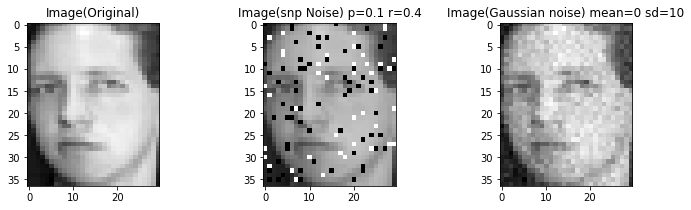

In [13]:
#Plot the results to show noisy images
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Original)')
plt.subplot(132)
plt.imshow(V_snp[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(snp Noise) p=0.1 r=0.4')
plt.subplot(133)
plt.imshow(V_g[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Gaussian noise) mean=0 sd=10')
plt.draw()
plt.savefig(image_path/"noisyImage", dpi=100)
plt.show()

In [15]:
###################### Image Reconstruction using NMF algorithms on contaminated images ################

#Using Hypersurface
np.random.seed(0)
nmf_hyper = NmfHyperEstimator(n_components=50) # set n_components to num_classes.
#Salt n Pepper noise
H = nmf_hyper.fit_transform(V_snp)
W = nmf_hyper.components_
V_snp_reconstructed_hyper = W @ H
#Gaussian noise
H = nmf_hyper.fit_transform(V_g)
V_g_reconstructed_hyper = W @ H

#Using L2NMF
np.random.seed(0)
nmf_L2 = NmfL2Estimator(n_components=50) # set n_components to num_classes.
#SaltNPepper noise
H = nmf_L2.fit_transform(V_snp)
W = nmf_L2.components_
V_snp_reconstructed_L2 = W @ H
#Gaussian noise
H = nmf_L2.fit_transform(V_g)
V_g_reconstructed_L2 = W @ H

#Using L1NMF
np.random.seed(0)
nmf_L1 = NmfL1Estimator(n_components=50) # set n_components to num_classes.
#SaltNPepper noise
H = nmf_L1.fit_transform(V_snp)
W = nmf_L1.components_
V_snp_reconstructed_L1 = W @ H
#Gaussian noise
H = nmf_L1.fit_transform(V_g)
V_g_reconstructed_L1 = W @ H

#Using L1NMF
np.random.seed(0)
nmf_L1 = NmfL1Estimator(n_components=50) # set n_components to num_classes.
#SaltNPepper noise
H = nmf_L1.fit_transform(V_snp)
W = nmf_L1.components_
V_snp_reconstructed_L1 = W @ H
#Gaussian noise
H = nmf_L1.fit_transform(V_g)
V_g_reconstructed_L1 = W @ H

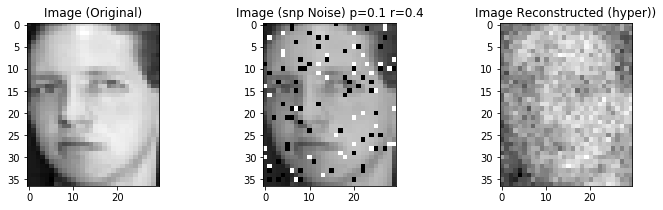

In [17]:
#Reconstructed image (snp noise) using hyper
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_snp[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (snp Noise) p=0.1 r=0.4')
plt.subplot(133)
plt.imshow(V_snp_reconstructed_hyper[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (hyper))')
plt.savefig(image_path/"reconstructedHyper_snp.png", dpi=100)

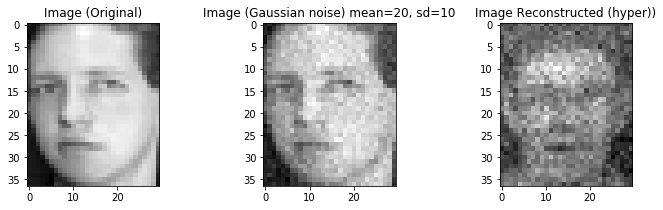

In [18]:
#Reconstructed image (Gaussian noise) using hyper
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_g[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Gaussian noise) mean=20, sd=10')
plt.subplot(133)
plt.imshow(V_g_reconstructed_hyper[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (hyper))')
plt.savefig(image_path/"reconstructedHyper_gaussian", dpi=100)

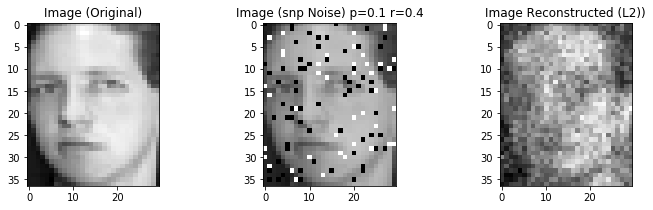

In [19]:
#Reconstructed image (snp noise) using L2NMF
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_snp[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (snp Noise) p=0.1 r=0.4')
plt.subplot(133)
plt.imshow(V_snp_reconstructed_L2[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (L2))')
plt.savefig(image_path/"reconstructedL2_snp", dpi=100)

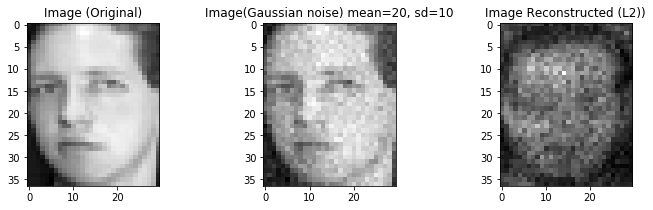

In [20]:
#Reconstructed image (Gaussian noise) using L2NMF
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_g[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Gaussian noise) mean=20, sd=10')
plt.subplot(133)
plt.imshow(V_g_reconstructed_L2[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (L2))')
plt.savefig(image_path/"reconstructedL2_gaussian", dpi=100)

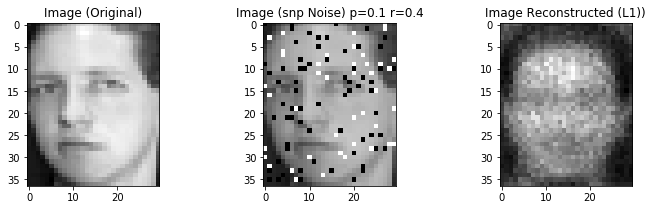

In [21]:
#Reconstructed image (snp noise) using L1NMF
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_snp[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (snp Noise) p=0.1 r=0.4')
plt.subplot(133)
plt.imshow(V_snp_reconstructed_L1[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (L1))')
plt.savefig(image_path/"reconstructedL1_snp", dpi=100)

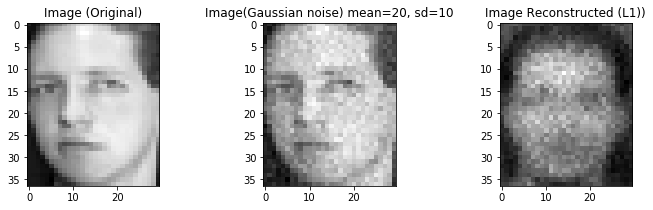

In [22]:
#Reconstructed image (Gaussian noise) using L1NMF
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_g[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Gaussian noise) mean=20, sd=10')
plt.subplot(133)
plt.imshow(V_g_reconstructed_L1[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (L1))')
plt.savefig(image_path/"reconstructedL1_gaussian", dpi=100)

### On unscaled data

In [23]:
#Loading the images and setting min=0 max=1 to disable scaling
V_hat, Y_hat = load_data(root='data/ORL', reduce=3)
scaler = ImageNormalizer(min=0,max=1)

#Salt and pepper noise
noise = SaltNPepper(p=0.1, r=0.4) 
V_snp = noise.fit_transform(V_hat)
V_snp = scaler.fit_transform(V_snp)

#Gaussian noise
noise_g = Gaussian(mean=0, sigma=10)
V_g = noise_g.fit_transform(V_hat)
V_g = scaler.fit_transform(V_g)

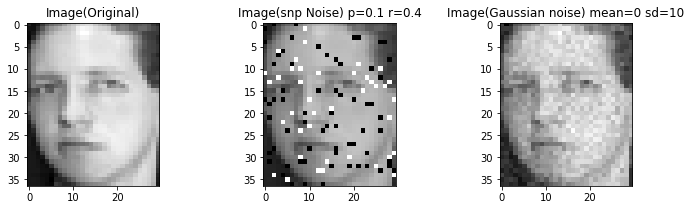

In [24]:
#Plot results of noisy images
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Original)')
plt.subplot(132)
plt.imshow(V_snp[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(snp Noise) p=0.1 r=0.4')
plt.subplot(133)
plt.imshow(V_g[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Gaussian noise) mean=0 sd=10')
plt.draw()
plt.savefig(image_path/"noisyImage", dpi=100)
plt.show()

In [25]:
###################### Image Reconstruction using NMF algorithms on contaminated images ################

#Using Hypersurface
np.random.seed(0)
nmf_hyper = NmfHyperEstimator(n_components=50) # set n_components to num_classes.
#Salt n Pepper noise
H = nmf_hyper.fit_transform(V_snp)
W = nmf_hyper.components_
V_snp_reconstructed_hyper = W @ H
#Gaussian noise
H = nmf_hyper.fit_transform(V_g)
V_g_reconstructed_hyper = W @ H

#Using L2NMF
np.random.seed(0)
nmf_L2 = NmfL2Estimator(n_components=50) # set n_components to num_classes.
#SaltNPepper noise
H = nmf_L2.fit_transform(V_snp)
W = nmf_L2.components_
V_snp_reconstructed_L2 = W @ H
#Gaussian noise
H = nmf_L2.fit_transform(V_g)
V_g_reconstructed_L2 = W @ H

#Using L1NMF
np.random.seed(0)
nmf_L1 = NmfL1Estimator(n_components=50) # set n_components to num_classes.
#SaltNPepper noise
H = nmf_L1.fit_transform(V_snp)
W = nmf_L1.components_
V_snp_reconstructed_L1 = W @ H
#Gaussian noise
H = nmf_L1.fit_transform(V_g)
V_g_reconstructed_L1 = W @ H

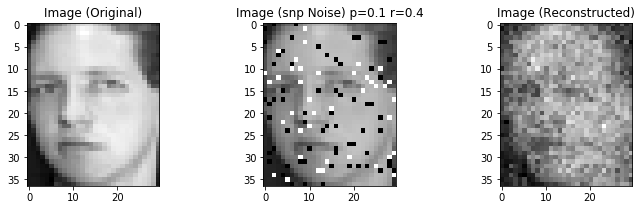

In [26]:
#Reconstructed image (snp noise) using hyper
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_snp[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (snp Noise) p=0.1 r=0.4')
plt.subplot(133)
plt.imshow(V_snp_reconstructed_hyper[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Reconstructed)')
plt.savefig(image_path/"reconstructedHyper_snp.png", dpi=100)

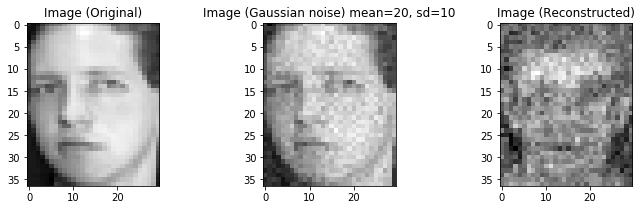

In [27]:
#Reconstructed image (Gaussian noise) using hyper
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_g[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Gaussian noise) mean=20, sd=10')
plt.subplot(133)
plt.imshow(V_g_reconstructed_hyper[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Reconstructed)')
plt.savefig(image_path/"reconstructedHyper_gaussian", dpi=100)

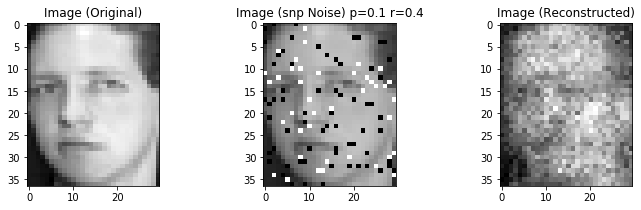

In [28]:
#Reconstructed image (snp noise) using L2NMF
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_snp[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (snp Noise) p=0.1 r=0.4')
plt.subplot(133)
plt.imshow(V_snp_reconstructed_L2[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Reconstructed)')
plt.savefig(image_path/"reconstructedL2_snp", dpi=100)

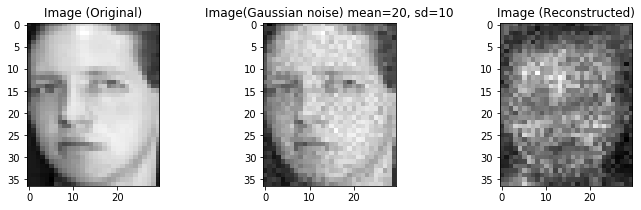

In [29]:
#Reconstructed (Gaussian noise) using L2NMF
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_g[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Gaussian noise) mean=20, sd=10')
plt.subplot(133)
plt.imshow(V_g_reconstructed_L2[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Reconstructed)')
plt.savefig(image_path/"reconstructedL2_gaussian", dpi=100)

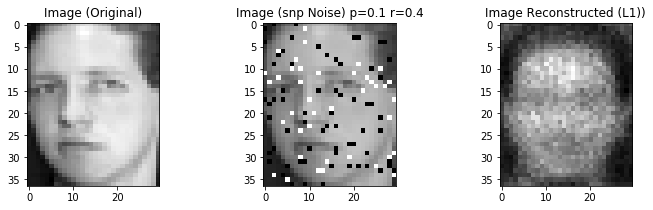

In [30]:
#Reconstructed (snp noise) using L1NMF
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_snp[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (snp Noise) p=0.1 r=0.4')
plt.subplot(133)
plt.imshow(V_snp_reconstructed_L1[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (L1))')
plt.savefig(image_path/"reconstructedL1_snp", dpi=100)

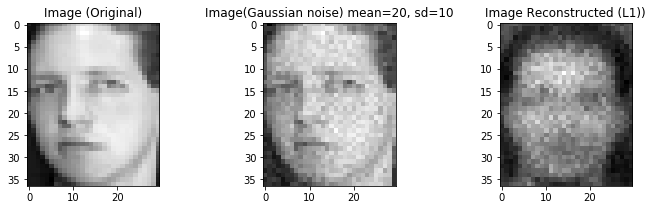

In [31]:
#Reconstructed (Gaussian noise) using L1NMF
img_size = [i//3 for i in (90, 111)] #ORL
ind = 2 # index of demo image.
plt.figure(figsize=(12, 3))
plt.subplot(131)
plt.imshow(V_hat[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image (Original)')
plt.subplot(132)
plt.imshow(V_g[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image(Gaussian noise) mean=20, sd=10')
plt.subplot(133)
plt.imshow(V_g_reconstructed_L1[:,ind].reshape(img_size[1],img_size[0]), cmap=plt.cm.gray)
plt.title('Image Reconstructed (L1))')
plt.savefig(image_path/"reconstructedL1_gaussian", dpi=100)

## 4. Performance comparisons using metrics (RRE, Accuracy and NMI)
### 4.1  (without scaling) with 40% samples

In [39]:
#Data loading and disabling scaling
X, Y, scaler = X_orl, Y_orl, ImageNormalizer(min=0,max=1)
alg_kwargs_pairs = [
    ModifiedNMF, 
    NmfL2Estimator,
    NmfHyperEstimator,
    NmfL1Estimator
]

metrics = [rre_score, acc_score, nmi_score]
metrics_names = ["rre", "acc_score", "nmi_score"]
n_trials = 5         #No of random samples considered for training
pc_sample = 0.4      #Training with 40% data

#### 4.1.1 Using Salt and Pepper noise

In [40]:
#Saltnpepper noise
all_n_components = range(30, 60, 20)
noise_alg = SaltNPepper
noise_levels = np.arange(0, 0.6, 0.1)
ratios = [0.5]
noise_kwargs_pairs = make_grid_alg_kwargs(noise_alg, p=noise_levels, r=ratios)

#Generate accuracy metrics
evaluations_snp_noscale_40 = benchmark(X_orl, Y_orl, scaler,
                        alg_kwargs_pairs, all_n_components,
                        noise_kwargs_pairs,
                        metrics, metrics_names,
                        n_trials, pc_sample
                       )

Noise: {'noise_id': 0, 'p': 0.0, 'r': 0.5}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 2
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 3
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 4
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
Noise: {'noise_id': 1, 'p': 0.1, 'r': 0.5}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHype

In [44]:
#Saving metrics data, grouping them and taking mean/std across 5 different samples
noscale_snp_40_mean = evaluations_snp_noscale_40.groupby(['alg','n_components','noise_id']).mean()
noscale_snp_40_mean = noscale_snp_40_mean.rename(columns={'rre':'rre_mean','acc_score':'acc_mean','nmi_score':'nmi_mean'})
noscale_snp_40_std = evaluations_snp_noscale_40.groupby(['alg','n_components','noise_id']).std()
noscale_snp_40_std = noscale_snp_40_std.rename(columns={'rre':'rre_sd','acc_score':'acc_sd','nmi_score':'nmi_sd'})
noscale_snp_40_std = noscale_snp_40_std.drop(columns=['p', 'r'])
noscale_snp_40_grouped = pd.concat([noscale_snp_40_mean, noscale_snp_40_std],axis=1)
noscale_snp_40_grouped.to_csv(csv_path/'Performance_snp_notScaled_40%.csv')
noscale_snp_40_grouped_idxreset = noscale_snp_40_grouped.reset_index()

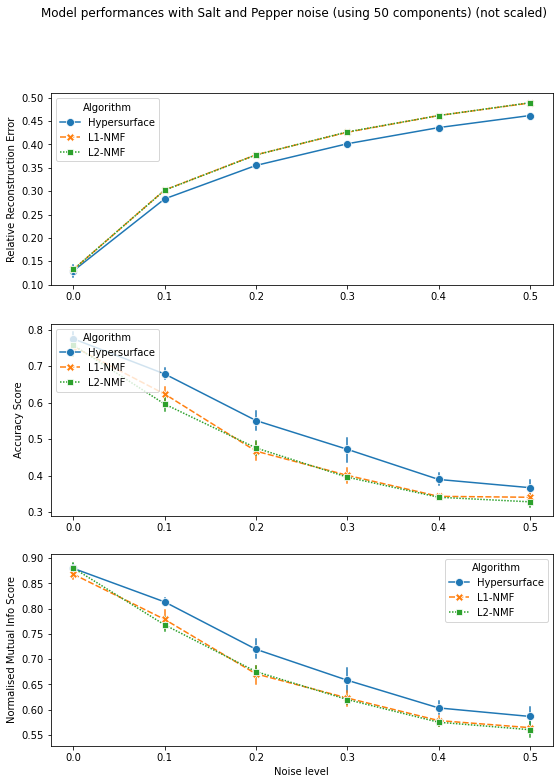

In [328]:
# Plotting RRE, Accuracy and NMI scores against different Salt & pepper noise levels for n_components=50
evaluations_snp_noscale_40 = evaluations_snp_noscale_40.sort_values('alg', axis=0)

fig = plt.figure(figsize=[9, 12])

ax = fig.add_subplot(311)
sns.lineplot(
    x="p",
    y="rre",
    hue="alg",
    style="alg",
    data=evaluations_snp_noscale_40.query("n_components == 50 and (alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator')"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    seed=None,
    sort=True,
    markers=True,
    markersize=8,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Relative Reconstruction Error")
ax.legend(title="Algorithm", loc="upper left", labels=['Hypersurface','L1-NMF','L2-NMF'])
plt.suptitle("Model performances with Salt and Pepper noise (using 50 components) (not scaled)")

ax = fig.add_subplot(312)
sns.lineplot(
    x="p",
    y="acc_score",
    hue="alg",
    style="alg",
    data=evaluations_snp_noscale_40.query("n_components == 50 and (alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator')"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
    #legend='full',
)
ax.set_xlabel('')
ax.set_ylabel("Accuracy Score")
ax.legend(title="Algorithm", loc="upper left", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(313)
sns.lineplot(
    x="p",
    y="nmi_score",
    hue="alg",
    style="alg",
    data=evaluations_snp_noscale_40.query("n_components == 50 and (alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator')"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel("Noise level")
ax.set_ylabel("Normalised Mutual Info Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])
plt.savefig("snp_notScaled_40%")

### 4.2 Performance comparison (with scaling) with 40% samples (repeat 5 times)

In [46]:
#Data loading and scaling
X, Y, scaler = X_orl, Y_orl, ImageNormalizer(min=None,max=None)
alg_kwargs_pairs = [
    ModifiedNMF, 
    NmfL2Estimator,
    NmfHyperEstimator,
    NmfL1Estimator    
]

metrics = [rre_score, acc_score, nmi_score]
metrics_names = ["rre", "acc_score", "nmi_score"]
n_trials = 5         #No of random samples considered for training
pc_sample = 0.4      #Training with 40% data

#### 4.2.1 Using Salt and Pepper noise

In [47]:
#Testing with Saltnpepper noise
all_n_components = [50]
noise_alg = SaltNPepper
noise_levels = np.arange(0, 0.6, 0.1)
ratios = [0.5]
noise_kwargs_pairs = make_grid_alg_kwargs(noise_alg, p=noise_levels, r=ratios)

scaled_snp_40 = benchmark(X_orl, Y_orl, scaler,
                        alg_kwargs_pairs, all_n_components,
                        noise_kwargs_pairs,
                        metrics, metrics_names,
                        n_trials, pc_sample
                       )

Noise: {'noise_id': 0, 'p': 0.0, 'r': 0.5}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 2
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 3
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 4
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
Noise: {'noise_id': 1, 'p': 0.1, 'r': 0.5}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHype

In [48]:
#Saving metrics data, grouping them and taking mean/std across 5 different samples
scaled_snp_40_mean = scaled_snp_40.groupby(['alg','n_components','noise_id']).mean()
scaled_snp_40_mean = scaled_snp_40_mean.rename(columns={'rre':'rre_mean','acc_score':'acc_mean','nmi_score':'nmi_mean'})
scaled_snp_40_std = scaled_snp_40.groupby(['alg','n_components','noise_id']).std()
scaled_snp_40_std = scaled_snp_40_std.rename(columns={'rre':'rre_sd','acc_score':'acc_sd','nmi_score':'nmi_sd'})
scaled_snp_40_std = scaled_snp_40_std.drop(columns=['p', 'r'])
scaled_snp_40_grouped = pd.concat([scaled_snp_40_mean, scaled_snp_40_std],axis=1)
scaled_snp_40_grouped.to_csv(csv_path/'Performance_snp_scaled_40%.csv')
scaled_snp_40_grouped_idxreset = scaled_snp_40_grouped.reset_index()

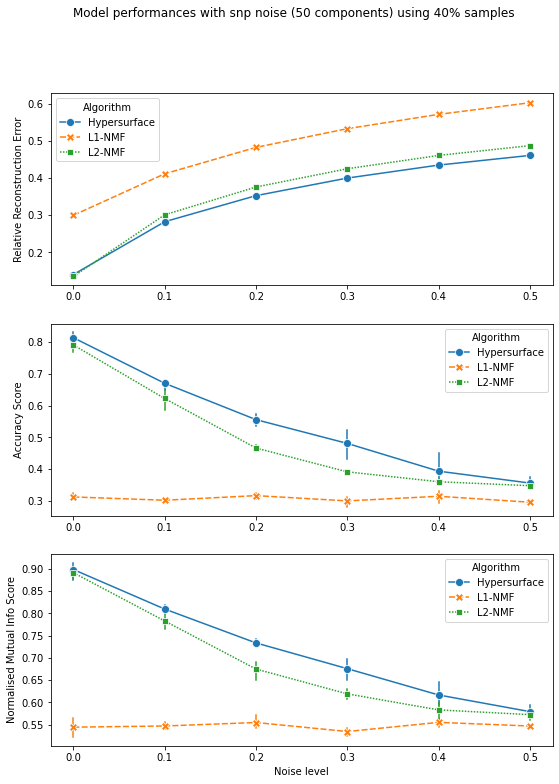

In [327]:
# Plotting RRE, Accuracy and NMI scores against different Salt & pepper noise levels for n_components=50
scaled_snp_40 = scaled_snp_40.sort_values('alg', axis=0)

fig = plt.figure(figsize=[9, 12])

ax = fig.add_subplot(311)
sns.lineplot(
    x="p",
    y="rre",
    hue="alg",
    style="alg",
    data=scaled_snp_40.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Relative Reconstruction Error")
ax.legend(title="Algorithm", loc="upper left", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(312)
sns.lineplot(
    x="p",
    y="acc_score",
    hue="alg",
    style="alg",
    data=scaled_snp_40.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Accuracy Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(313)
sns.lineplot(
    x="p",
    y="nmi_score",
    hue="alg",
    style="alg",
    data=scaled_snp_40.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    markers=True,
    markersize=8,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel("Noise level")
ax.set_ylabel("Normalised Mutual Info Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])
plt.suptitle("Model performances with snp noise (50 components) using 40% samples")
plt.savefig("snp_scaled_40%")

#### 4.2.2 Using Gaussian noise

In [50]:
# Gaussian noise
noise_alg = Gaussian
all_n_components = [50]
means = [0]
sigmas = list(range(0, 25, 5))
noise_kwargs_pairs = make_grid_alg_kwargs(noise_alg, mean=means, sigma=sigmas)

Gauss_scaled_40 = benchmark(X_orl, Y_orl, scaler,
                        alg_kwargs_pairs, all_n_components,
                        noise_kwargs_pairs,
                        metrics, metrics_names,
                        n_trials, pc_sample
                       )

Noise: {'noise_id': 0, 'mean': 0, 'sigma': 0}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 2
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 3
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 4
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
Noise: {'noise_id': 1, 'mean': 0, 'sigma': 5}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: N

In [51]:
#Saving metrics data, grouping them and taking mean/std across 5 different samples
Gauss_scaled_40_mean = Gauss_scaled_40.groupby(['alg','n_components','noise_id']).mean()
Gauss_scaled_40_mean = Gauss_scaled_40_mean.rename(columns={'rre':'rre_mean','acc_score':'acc_mean','nmi_score':'nmi_mean'})
Gauss_scaled_40_std = Gauss_scaled_40.groupby(['alg','n_components','noise_id']).std()
Gauss_scaled_40_std = Gauss_scaled_40_std.rename(columns={'rre':'rre_sd','acc_score':'acc_sd','nmi_score':'nmi_sd'})
Gauss_scaled_40_std = Gauss_scaled_40_std.drop(columns=['mean', 'sigma'])
Gauss_scaled_40_grouped = pd.concat([Gauss_scaled_40_mean, Gauss_scaled_40_std],axis=1)
Gauss_scaled_40_grouped.to_csv(csv_path/'Performance_Gauss_Scaled_40%.csv')
Gauss_scaled_40_grouped_idxreset = Gauss_scaled_40_grouped.reset_index()

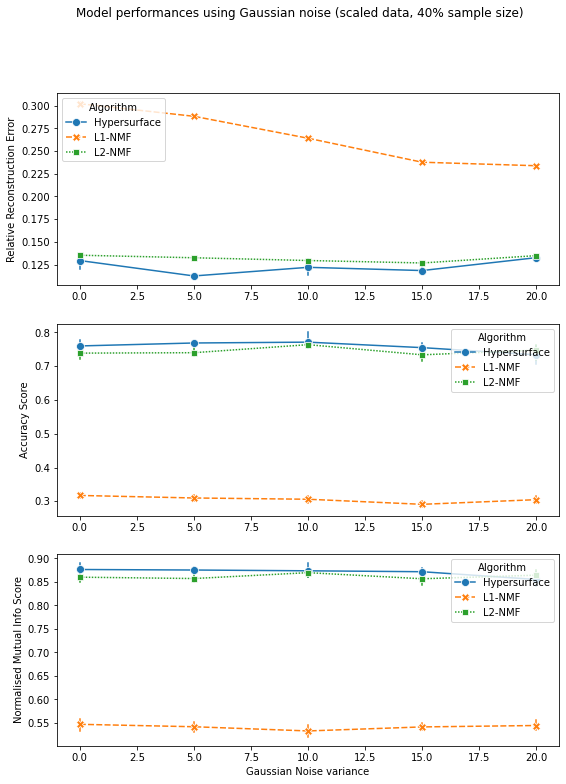

In [331]:
# Plotting RRE, Accuracy and NMI scores against different Gaussian noise levels for n_components=50
Gauss_scaled_40 = Gauss_scaled_40.sort_values('alg', axis=0)

fig = plt.figure(figsize=[9, 12])

ax = fig.add_subplot(311)
sns.lineplot(
    x="sigma",
    y="rre",
    hue="alg",
    style="alg",
    data=Gauss_scaled_40.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Relative Reconstruction Error")
ax.legend(title="Algorithm", loc="upper left", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(312)
sns.lineplot(
    x="sigma",
    y="acc_score",
    hue="alg",
    style="alg",
    data=Gauss_scaled_40.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Accuracy Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(313)
sns.lineplot(
    x="sigma",
    y="nmi_score",
    hue="alg",
    style="alg",
    data=Gauss_scaled_40.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    markers=True,
    markersize=8,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel("Gaussian Noise variance")
ax.set_ylabel("Normalised Mutual Info Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])
plt.suptitle("Model performances using Gaussian noise (scaled data, 40% sample size)")
plt.savefig("Gaussian_scaled_40%")

### 4.3 Performance comparison (with scaling) using 90% samples (repeat 5 times)

In [53]:
#Data loading and scaling
X, Y, scaler = X_orl, Y_orl, ImageNormalizer(min=None,max=None)
alg_kwargs_pairs = [
    ModifiedNMF, 
    NmfL2Estimator,
    NmfHyperEstimator,
    NmfL1Estimator    
]

metrics = [rre_score, acc_score, nmi_score]
metrics_names = ["rre", "acc_score", "nmi_score"]
n_trials = 5         #No of random samples considered for training
pc_sample = 0.9      #Training with 90% data

#### 4.3.1 Using Salt and Pepper noise

In [54]:
#Saltnpepper noise
all_n_components = [50]
noise_alg = SaltNPepper
noise_levels = np.arange(0, 0.7, 0.1)
ratios = [0.5] #np.arange(0.0, 1, 0.5)
noise_kwargs_pairs = make_grid_alg_kwargs(noise_alg, p=noise_levels, r=ratios)

evaluations_90_snp = benchmark(X_orl, Y_orl, scaler,
                        alg_kwargs_pairs, all_n_components,
                        noise_kwargs_pairs,
                        metrics, metrics_names,
                        n_trials, pc_sample
                       )

Noise: {'noise_id': 0, 'p': 0.0, 'r': 0.5}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 2
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 3
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 4
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
Noise: {'noise_id': 1, 'p': 0.1, 'r': 0.5}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHype

In [55]:
#Saving metrics data, grouping them and taking mean/std across 5 different samples
evaluations_snp_mean = evaluations_90_snp.groupby(['alg','n_components','noise_id']).mean()
evaluations_snp_mean = evaluations_snp_mean.rename(columns={'rre':'rre_mean','acc_score':'acc_mean','nmi_score':'nmi_mean'})
evaluations_snp_std = evaluations_90_snp.groupby(['alg','n_components','noise_id']).std()
evaluations_snp_std = evaluations_snp_std.rename(columns={'rre':'rre_sd','acc_score':'acc_sd','nmi_score':'nmi_sd'})
evaluations_snp_std = evaluations_snp_std.drop(columns=['p', 'r'])
evaluations_snp_grouped = pd.concat([evaluations_snp_mean, evaluations_snp_std],axis=1)
evaluations_snp_grouped.to_csv(csv_path/'Performance_snp_scaled_90%.csv')
evaluations_snp_grouped_idxreset = evaluations_snp_grouped.reset_index()

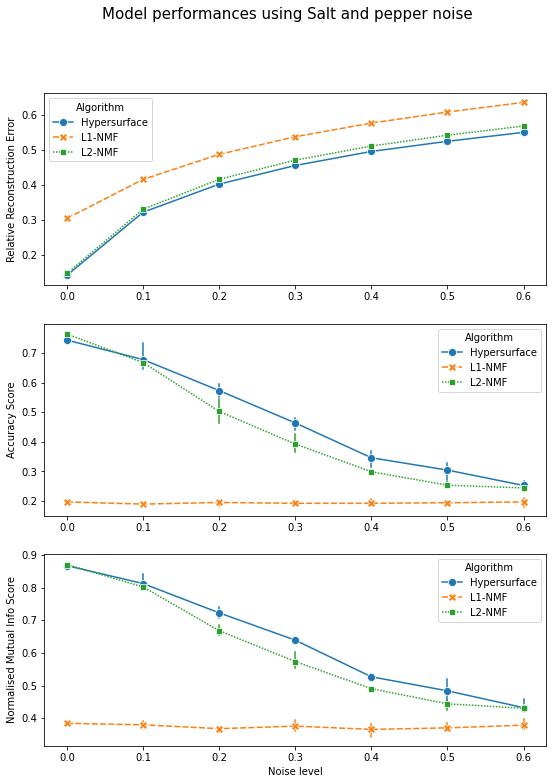

In [330]:
# Plotting RRE, Accuracy and NMI scores against different Salt & pepper noise levels for n_components=50
evaluations_90_snp = evaluations_90_snp.sort_values('alg', axis=0)

fig = plt.figure(figsize=[9, 12])

ax = fig.add_subplot(311)
sns.lineplot(
    x="p",
    y="rre",
    hue="alg",
    style="alg",
    data=evaluations_90_snp.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Relative Reconstruction Error")
ax.legend(title="Algorithm", loc="upper left", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(312)
sns.lineplot(
    x="p",
    y="acc_score",
    hue="alg",
    style="alg",
    data=evaluations_90_snp.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Accuracy Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(313)
sns.lineplot(
    x="p",
    y="nmi_score",
    hue="alg",
    style="alg",
    data=evaluations_90_snp.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    markers=True,
    markersize=8,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel("Noise level")
ax.set_ylabel("Normalised Mutual Info Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])
plt.suptitle("Model performances using Salt and pepper noise", size=15)
plt.savefig("snp_scaled_90%")

#### 4.3.2 Using Gaussian noise

In [57]:
# Gaussian noise
all_n_components = [50]
noise_alg = Gaussian
means = [0]
sigmas = list(range(0, 36, 5))
noise_kwargs_pairs = make_grid_alg_kwargs(noise_alg, mean=means, sigma=sigmas)

evaluations_g = benchmark(X_orl, Y_orl, scaler,
                        alg_kwargs_pairs, all_n_components,
                        noise_kwargs_pairs,
                        metrics, metrics_names,
                        n_trials, pc_sample
                       )

Noise: {'noise_id': 0, 'mean': 0, 'sigma': 0}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 2
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 3
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 4
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
Noise: {'noise_id': 1, 'mean': 0, 'sigma': 5}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: N

In [58]:
#Saving metrics data, grouping them and taking mean/std across 5 different samples
evaluations_g_mean = evaluations_g.groupby(['alg','n_components','noise_id']).mean()
evaluations_g_mean = evaluations_g_mean.rename(columns={'rre':'rre_mean','acc_score':'acc_mean','nmi_score':'nmi_mean'})
evaluations_g_std = evaluations_g.groupby(['alg','n_components','noise_id']).std()
evaluations_g_std = evaluations_g_std.rename(columns={'rre':'rre_sd','acc_score':'acc_sd','nmi_score':'nmi_sd'})
evaluations_g_std = evaluations_g_std.drop(columns=['mean', 'sigma'])
evaluations_g_grouped = pd.concat([evaluations_g_mean, evaluations_g_std],axis=1)
evaluations_g_grouped.to_csv(csv_path/'Performance_g_90%.csv')
evaluations_g_grouped_idxreset = evaluations_g_grouped.reset_index()

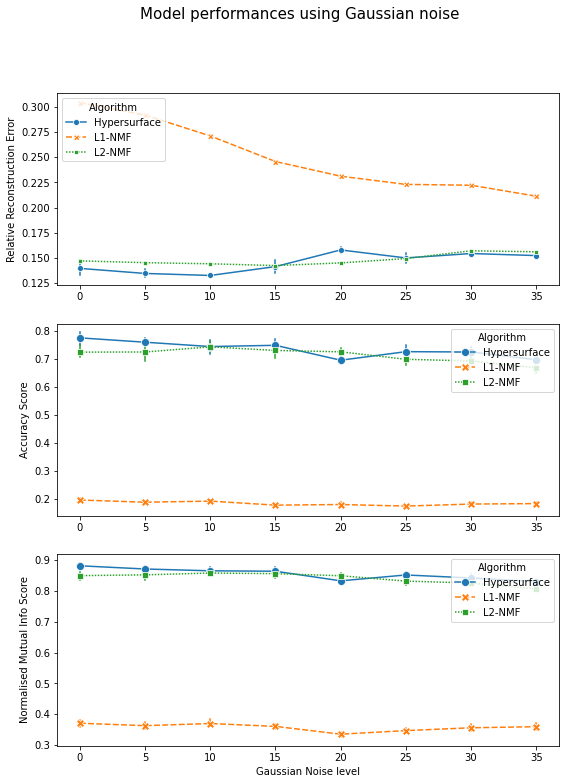

In [335]:
# Plotting RRE, Accuracy and NMI scores against different Salt & pepper noise levels for n_components=50
evaluations_g = evaluations_g.sort_values('alg', axis=0)

fig = plt.figure(figsize=[9, 12])

ax = fig.add_subplot(311)
sns.lineplot(
    x="sigma",
    y="rre",
    hue="alg",
    style="alg",
    data=evaluations_g.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Relative Reconstruction Error")
ax.legend(title="Algorithm", loc="upper left", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(312)
sns.lineplot(
    x="sigma",
    y="acc_score",
    hue="alg",
    style="alg",
    data=evaluations_g.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Accuracy Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(313)
sns.lineplot(
    x="sigma",
    y="nmi_score",
    hue="alg",
    style="alg",
    data=evaluations_g.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    markers=True,
    markersize=8,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel("Gaussian Noise level")
ax.set_ylabel("Normalised Mutual Info Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])
plt.suptitle("Model performances using Gaussian noise", size=15)
plt.savefig("Gaussian_scaled_90%")

### 4.4 Effect of number of components on performance

In [60]:
#Data loading and scaling
X, Y, scaler = X_orl, Y_orl, ImageNormalizer(min=None,max=None)
alg_kwargs_pairs = [
    ModifiedNMF, 
    NmfL2Estimator,
    NmfHyperEstimator,
    NmfL1Estimator    
]

metrics = [rre_score, acc_score, nmi_score]
metrics_names = ["rre", "acc_score", "nmi_score"]
n_trials = 5         #No of random samples considered for training
pc_sample = 0.9      #Training with 90% data

In [61]:
#Saltnpepper noise
all_n_components = np.arange(10, 60, 10)
noise_alg = SaltNPepper
noise_levels = [0.1]
ratios = [0.5]
noise_kwargs_pairs = make_grid_alg_kwargs(noise_alg, p=noise_levels, r=ratios)

evaluations_comp = benchmark(X_orl, Y_orl, scaler,
                        alg_kwargs_pairs, all_n_components,
                        noise_kwargs_pairs,
                        metrics, metrics_names,
                        n_trials, pc_sample
                       )

Noise: {'noise_id': 0, 'p': 0.1, 'r': 0.5}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 2
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 3
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 4
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}


In [62]:
#Saving metrics data, grouping them and taking mean/std across 5 different samples
evaluations_comp_mean = evaluations_comp.groupby(['alg','n_components','noise_id']).mean()
evaluations_comp_mean = evaluations_comp_mean.rename(columns={'rre':'rre_mean','acc_score':'acc_mean','nmi_score':'nmi_mean'})
evaluations_comp_std = evaluations_comp.groupby(['alg','n_components','noise_id']).std()
evaluations_comp_std = evaluations_comp_std.rename(columns={'rre':'rre_sd','acc_score':'acc_sd','nmi_score':'nmi_sd'})
evaluations_comp_std = evaluations_comp_std.drop(columns=['p', 'r'])
evaluations_comp_grouped = pd.concat([evaluations_comp_mean, evaluations_comp_std],axis=1)
evaluations_comp_grouped.to_csv(csv_path/'Performance_components_90%.csv')
evaluations_comp_grouped_idxreset = evaluations_comp_grouped.reset_index()

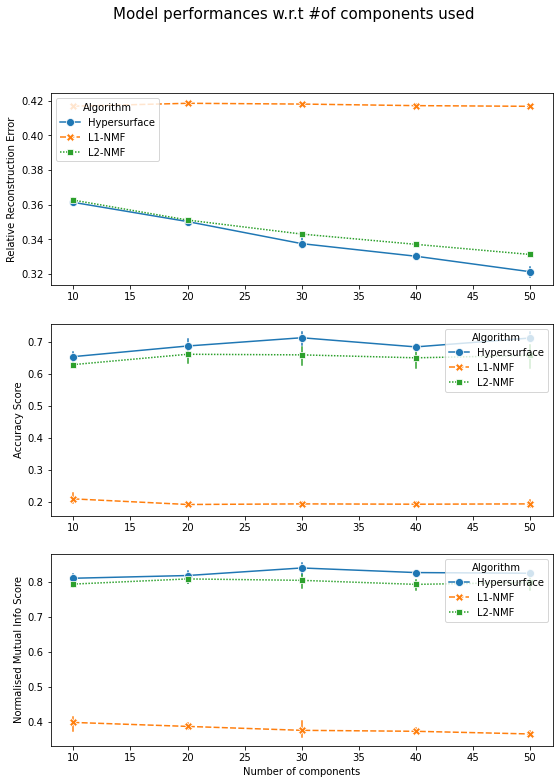

In [338]:
# Plotting RRE, Accuracy and NMI scores against number of components (using salt & pepper, p=0.1, r=0.5)
evaluations_comp = evaluations_comp.sort_values('alg', axis=0)

fig = plt.figure(figsize=[9, 12])

ax = fig.add_subplot(311)
sns.lineplot(
    x="n_components",
    y="rre",
    hue="alg",
    style="alg",
    data=evaluations_comp.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Relative Reconstruction Error")
ax.legend(title="Algorithm", loc="upper left", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(312)
sns.lineplot(
    x="n_components",
    y="acc_score",
    hue="alg",
    style="alg",
    data=evaluations_comp.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Accuracy Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(313)
sns.lineplot(
    x="n_components",
    y="nmi_score",
    hue="alg",
    style="alg",
    data=evaluations_comp.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    markers=True,
    markersize=8,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel("Number of components")
ax.set_ylabel("Normalised Mutual Info Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])

plt.suptitle("Model performances w.r.t #of components used", size=15)
plt.savefig("snp_component_90%")

### 4.5 Checking performance with varying r (salt:pepper ratio)

In [64]:
#Data loading and scaling
X, Y, scaler = X_orl, Y_orl, ImageNormalizer(min=None,max=None)
pc_sample = 0.9      #Training with 90% data

#Saltnpepper noise
all_n_components = [10]
noise_alg = SaltNPepper
noise_levels = [0.1]
ratios = [0.0, 0.5, 1.0]
noise_kwargs_pairs = make_grid_alg_kwargs(noise_alg, p=noise_levels, r=ratios)

evaluation_snp_ratio = benchmark(X_orl, Y_orl, scaler,
                        alg_kwargs_pairs, all_n_components,
                        noise_kwargs_pairs,
                        metrics, metrics_names,
                        n_trials, pc_sample
                       )

Noise: {'noise_id': 0, 'p': 0.1, 'r': 0.0}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 2
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 3
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 4
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
Noise: {'noise_id': 1, 'p': 0.1, 'r': 0.5}
    Trail: 0
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHyperEstimator {}
        Alg: NmfL1Estimator {}
    Trail: 1
        Alg: ModifiedNMF {}
        Alg: NmfL2Estimator {}
        Alg: NmfHype

In [65]:
#Saving metrics data, grouping them and taking mean/std across 5 different samples
evaluation_snp_ratio_mean = evaluation_snp_ratio.groupby(['alg','n_components','noise_id']).mean()
evaluation_snp_ratio_mean = evaluation_snp_ratio_mean.rename(columns={'rre':'rre_mean','acc_score':'acc_mean','nmi_score':'nmi_mean'})
evaluation_snp_ratio_std = evaluation_snp_ratio.groupby(['alg','n_components','noise_id']).std()
evaluation_snp_ratio_std = evaluation_snp_ratio_std.rename(columns={'rre':'rre_sd','acc_score':'acc_sd','nmi_score':'nmi_sd'})
evaluation_snp_ratio_std = evaluation_snp_ratio_std.drop(columns=['p', 'r'])
evaluation_snp_ratio_grouped = pd.concat([evaluation_snp_ratio_mean, evaluation_snp_ratio_std],axis=1)
evaluation_snp_ratio_grouped.to_csv(csv_path/'Performance_ratio_90%.csv')
evaluation_snp_ratio_grouped_idxreset = evaluation_snp_ratio_grouped.reset_index()

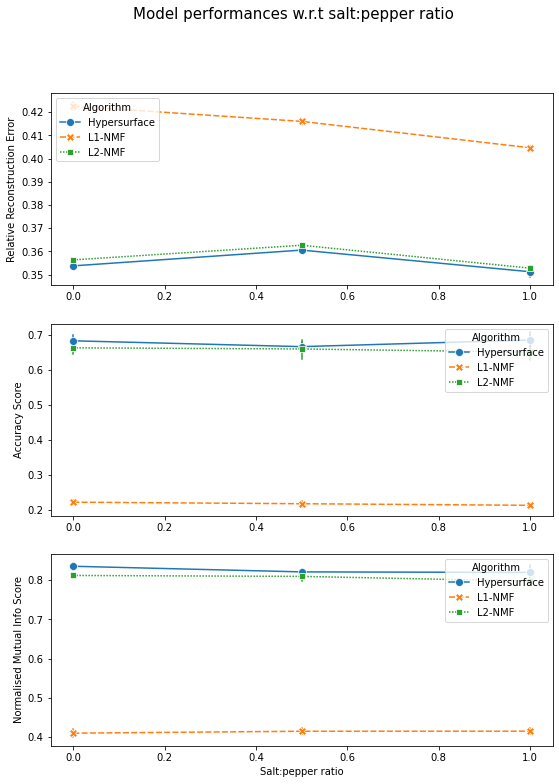

In [342]:
# Plotting RRE, Accuracy and NMI scores against salt & pepper ratio (r) (with 10 components and p=0.1)
evaluation_snp_ratio = evaluation_snp_ratio.sort_values('alg', axis=0)

fig = plt.figure(figsize=[9, 12])

ax = fig.add_subplot(311)
sns.lineplot(
    x="r",
    y="rre",
    hue="alg",
    style="alg",
    data=evaluation_snp_ratio.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Relative Reconstruction Error")
ax.legend(title="Algorithm", loc="upper left", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(312)
sns.lineplot(
    x="r",
    y="acc_score",
    hue="alg",
    style="alg",
    data=evaluation_snp_ratio.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    n_boot=1000,
    markers=True,
    markersize=8,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel('')
ax.set_ylabel("Accuracy Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])

ax = fig.add_subplot(313)
sns.lineplot(
    x="r",
    y="nmi_score",
    hue="alg",
    style="alg",
    data=evaluation_snp_ratio.query("alg=='NmfL2Estimator' or alg=='NmfHyperEstimator' or alg=='NmfL1Estimator'"),
    estimator='mean',
    ci=95,
    markers=True,
    markersize=8,
    n_boot=1000,
    seed=None,
    sort=True,
    err_style='bars',
)
ax.set_xlabel("Salt:pepper ratio")
ax.set_ylabel("Normalised Mutual Info Score")
ax.legend(title="Algorithm", loc="upper right", labels=['Hypersurface','L1-NMF','L2-NMF'])

plt.suptitle("Model performances w.r.t salt:pepper ratio", size=15)
plt.savefig("snp_ratio_90%")